In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [2]:
customer_data = pd.read_csv('Mall_Customers.csv')

In [3]:
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# Data Preprocessing
X = customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# K-means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
customer_data['KMeansCluster'] = kmeans.labels_

C:\Users\notif\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\notif\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
# Model-based Clustering (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X_scaled)
customer_data['GMMCluster'] = gmm.predict(X_scaled)

C:\Users\notif\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
# Analyzing the Results
# Analyze and visualize the clusters formed by each algorithm

# K-means Clustering Results
kmeans_clusters = customer_data.groupby('KMeansCluster').mean()
print("K-means Clustering Results:")
print(kmeans_clusters)

K-means Clustering Results:
               CustomerID        Age  Annual Income (k$)  \
KMeansCluster                                              
0               83.872340  55.638298           54.382979   
1              161.025000  32.875000           86.100000   
2               55.648148  25.185185           41.092593   
3               24.100000  46.250000           26.750000   
4              159.743590  39.871795           86.102564   

               Spending Score (1-100)  GMMCluster  
KMeansCluster                                      
0                           48.851064    0.148936  
1                           81.525000    0.975000  
2                           62.240741    1.962963  
3                           18.350000    3.000000  
4                           19.358974    3.538462  


C:\Users\notif\AppData\Local\Temp\ipykernel_24144\4158350423.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kmeans_clusters = customer_data.groupby('KMeansCluster').mean()


In [8]:
# Model-based Clustering Results
gmm_clusters = customer_data.groupby('GMMCluster').mean()
print("Model-based Clustering Results:")
print(gmm_clusters)

Model-based Clustering Results:
            CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
GMMCluster                                                                      
0            86.313725  53.392157           55.372549               48.980392   
1           162.000000  32.692308           86.538462               82.128205   
2            60.811321  24.830189           43.226415               62.037736   
3            23.000000  45.217391           26.304348               20.913043   
4           165.529412  41.647059           88.735294               16.764706   

            KMeansCluster  
GMMCluster                 
0                0.333333  
1                1.000000  
2                2.113208  
3                2.782609  
4                3.882353  


C:\Users\notif\AppData\Local\Temp\ipykernel_24144\3040729529.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gmm_clusters = customer_data.groupby('GMMCluster').mean()


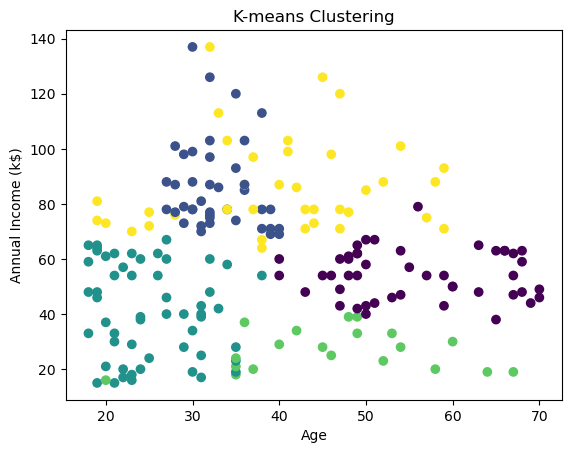

In [9]:
# Visualize the Clusters
plt.scatter(customer_data['Age'], customer_data['Annual Income (k$)'], c=customer_data['KMeansCluster'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('K-means Clustering')
plt.show()

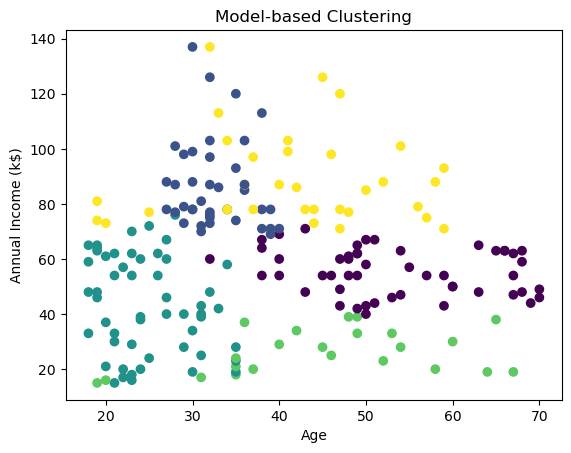

In [10]:
plt.scatter(customer_data['Age'], customer_data['Annual Income (k$)'], c=customer_data['GMMCluster'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Model-based Clustering')
plt.show()